In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Data preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [3]:
# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []

In [4]:
class ELMClassifier:
    def __init__(self, n_hidden):
        self.n_hidden = n_hidden
        self.input_weights = None
        self.output_weights = None

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Randomly initialize input weights
        self.input_weights = np.random.randn(n_features, self.n_hidden)

        # Compute hidden layer output
        hidden_output = self._sigmoid(X @ self.input_weights)

        # Solve for output weights using pseudoinverse
        self.output_weights = np.linalg.pinv(hidden_output) @ y

    def predict(self, X):
        hidden_output = self._sigmoid(X @ self.input_weights)
        predicted_output = hidden_output @ self.output_weights
        return np.argmax(predicted_output, axis=1)

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and train the Elm classifier
    elm_classifier = ELMClassifier(n_hidden=100)
    elm_classifier.fit(X_train, np.eye(3)[y_train])

    # Make predictions on the test set
    y_pred = elm_classifier.predict(X_train)

    # Evaluate the model
    accuracy = np.mean(y_pred == y_train)
    accuracy_scores.append(accuracy)

In [5]:
# Display average accuracy across folds
average_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy: {average_accuracy:.2f}")

Average Accuracy: 1.00


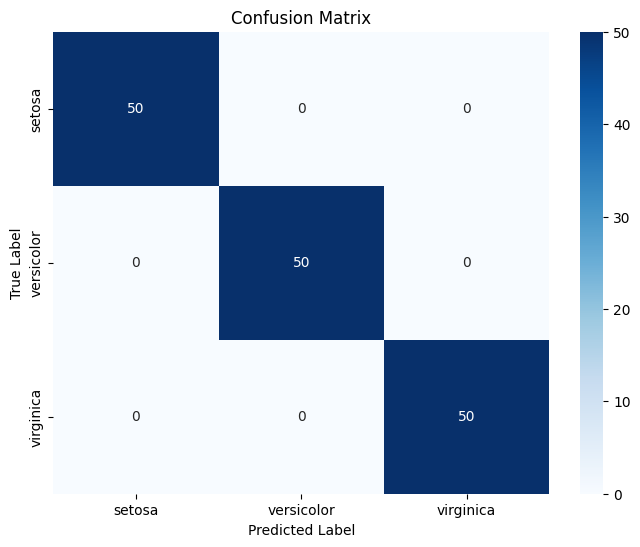

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize an instance of the ELM classifier
elm_classifier = ELMClassifier(n_hidden=100)

# Fit the classifier to the entire dataset
elm_classifier.fit(X, np.eye(3)[y])  # Assuming y is the target variable

# Make predictions on the entire dataset
y_pred = elm_classifier.predict(X)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


ELM for California House Price Prediction 

In [13]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

class ELMRegressor:
    def __init__(self, n_hidden):
        self.n_hidden = n_hidden
        self.input_weights = None
        self.output_weights = None

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Randomly initialize input weights
        self.input_weights = np.random.randn(n_features, self.n_hidden)

        # Compute hidden layer output
        hidden_output = self._sigmoid(X @ self.input_weights)

        # Solve for output weights using pseudoinverse
        self.output_weights = np.linalg.pinv(hidden_output) @ y

    def predict(self, X):
        hidden_output = self._sigmoid(X @ self.input_weights)
        predicted_output = hidden_output @ self.output_weights
        return predicted_output

# Load California housing price dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the ELM regressor
n_hidden = 100
elm_regressor = ELMRegressor(n_hidden=n_hidden)
elm_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = elm_regressor.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.44558040651001


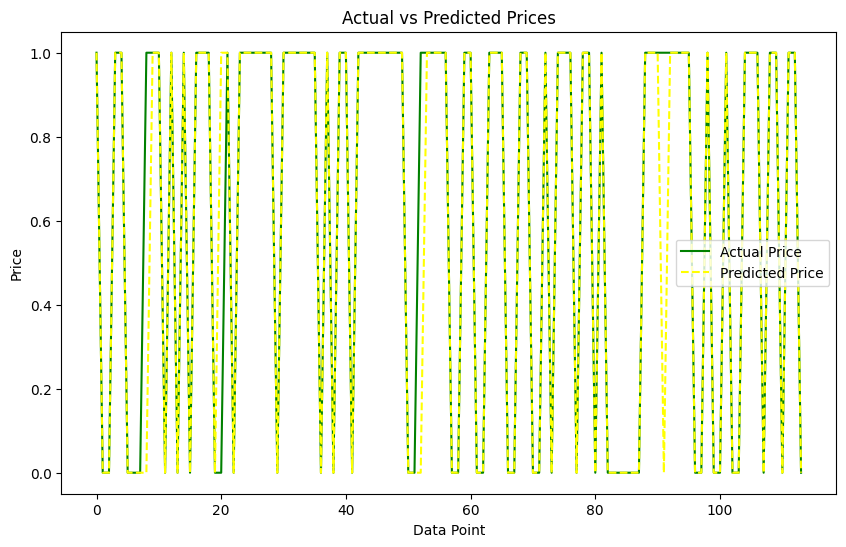

In [20]:
import matplotlib.pyplot as plt

# Plot actual and predicted prices
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, color='green', label='Actual Price')
plt.plot(range(len(y_test)), y_pred, color='yellow', linestyle='--', label='Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Data Point')
plt.ylabel('Price')
plt.legend()
plt.show()


ELM for Breast Cancer Detection Dataset

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

class ELMClassifier:
    def __init__(self, n_hidden):
        self.n_hidden = n_hidden
        self.input_weights = None
        self.output_weights = None

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Randomly initialize input weights
        self.input_weights = np.random.randn(n_features, self.n_hidden)

        # Compute hidden layer output
        hidden_output = self._sigmoid(X @ self.input_weights)

        # Solve for output weights using pseudoinverse
        self.output_weights = np.linalg.pinv(hidden_output) @ y

    def predict(self, X):
        hidden_output = self._sigmoid(X @ self.input_weights)
        predicted_output = hidden_output @ self.output_weights
        return np.argmax(predicted_output, axis=1)

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the ELM classifier
n_hidden = 100
elm_classifier = ELMClassifier(n_hidden=n_hidden)
elm_classifier.fit(X_train, np.eye(2)[y_train])

# Make predictions on the test set
y_pred = elm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9649122807017544


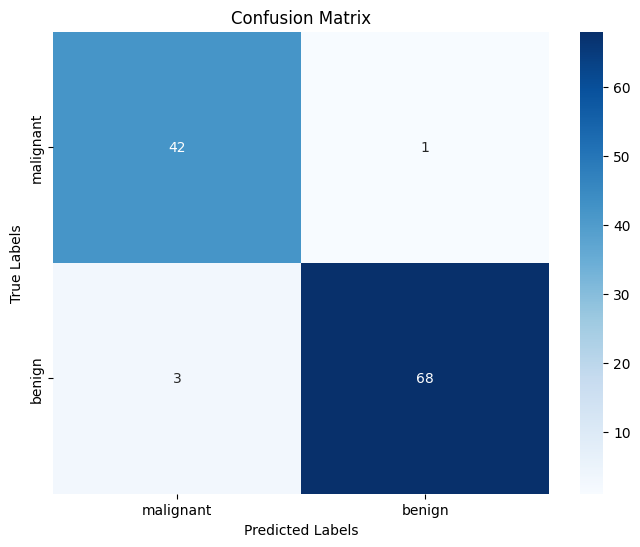

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
